# Linear Regression

![](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is most simple type of regression method present.

## Working :
- We assume dependent and independent variables are both linearly related.
- We assume a line with which we will predict , but at first it is not good.
- So use **MSE(Mean Squared Error)** as loss function and use gradient descent to reduce the overall mse.
- To measure the performance of algorithm we use R2 statistics.

In [47]:
import numpy as np 
import scipy.stats as s
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly as py

In [48]:
raw_data = pd.read_csv("D:/Document/Datasets/Real estate.csv")

In [49]:
raw_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
raw_data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [51]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [52]:
raw_data.drop("No",axis=1,inplace=True)

In [53]:
raw_data.drop("X1 transaction date",axis=1,inplace=True)

In [54]:
raw_data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### Preparing data 

In [107]:
class PrepareData:
    def __init__(self,df):
        self.col = []
        self.X_train = None
        self.X_test = None
        self.Y_train = None
        self.Y_test = None
        self.X_train_std = None
        self.X_test_std = None
        self.df = df
    def columns_to_replace(self):
        '''
        To select columns with object data type so as to convert them into integer datatype
        '''
        for i in self.df.columns:
            if self.df[i].dtype == 'O':
                self.col.append(i)
    def to_categorical(self):
        '''
        Replaces columns with object data type to integer data type
        '''
        self.columns_to_replace()
        for i in self.col:
            if self.df[i].nunique() == 2:
                self.df[i].replace(to_replace = self.df[i].unique() , value = [0,1] ,inplace = True)
            elif self.df[i].nunique() == 3:
                self.df[i].replace(to_replace = self.df[i].unique() , value = [0,1,-1],inplace = True)
            else:
                self.df[i].replace(to_replace = self.df[i].unique() , value = np.arange(0,self.df[i].nunique()),inplace = True)
                
    def train_test_split(self):
        '''
        Splits the data into train data and test data.
        Returns:
        X_Train-> training dataset
        X_test -> test datset
        Y_train -> training labels.
        Y_test ->testing labels
        '''
        self.to_categorical()
        number_of_rows = int(0.8*self.df.shape[0])
        self.X_train = self.df.iloc[0:number_of_rows]
        self.Y_train = np.array(self.df['Y house price of unit area'].iloc[0:number_of_rows])
        self.Y_train = self.Y_train.reshape(self.Y_train.shape[0],1)
        self.X_train.drop('Y house price of unit area',axis=1,inplace=True)
        self.X_test = self.df.iloc[number_of_rows:]
        self.Y_test = np.array(self.df['Y house price of unit area'].iloc[number_of_rows:])
        self.Y_test = self.Y_test.reshape(self.Y_test.shape[0],1)
        self.X_test.drop('Y house price of unit area',axis=1,inplace=True)
        return self.X_train,self.Y_train,self.X_test,self.Y_test
    def standardize(self):
        '''
        Standardises the dataset and also adds an array of 1 in each dataset so as to facilitate the use of algorithm
        Returns:
        X_train_std-> Standardised X_train Dataset in np.array format
        X_test_Std -> Standardised X_test Dataset in np.array format
        Y_train-> training labels
        Y_test-> testing labels.
        
        '''
        self.X_train,self.Y_train,self.X_test,self.Y_test = self.train_test_split()
        self.X_train_std = np.array((self.X_train - self.X_train.mean()) / self.X_train.std()) 
        self.X_train_std = np.array(list(map(lambda x: np.append([1],x) , self.X_train_std)))
        self.X_test_std = np.array((self.X_test - self.X_train.mean()) / self.X_train.std())
        self.X_test_std = np.array(list(map(lambda x: np.append([1],x) , self.X_test_std)))
        self.Y_test = self.Y_test.reshape(self.Y_test.shape[0],1)
        self.Y_train = self.Y_train.reshape(self.Y_train.shape[0],1)
        return self.X_train_std,self.Y_train,self.X_test_std,self.Y_test

In [108]:
raw_data_copy = raw_data

### Data Visualisation

array([[<AxesSubplot:title={'center':'X2 house age'}>,
        <AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>],
       [<AxesSubplot:title={'center':'X6 longitude'}>,
        <AxesSubplot:title={'center':'Y house price of unit area'}>]],
      dtype=object)

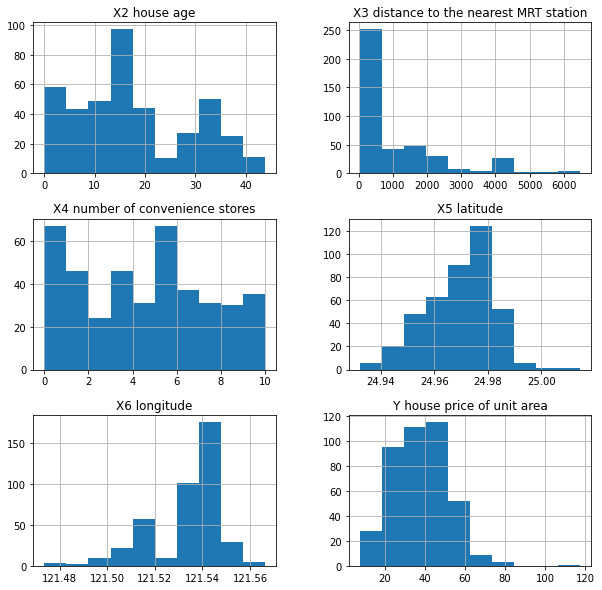

In [109]:
raw_data_copy.hist(figsize=(10,10))

In [110]:
corr = raw_data.corr()
corr

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

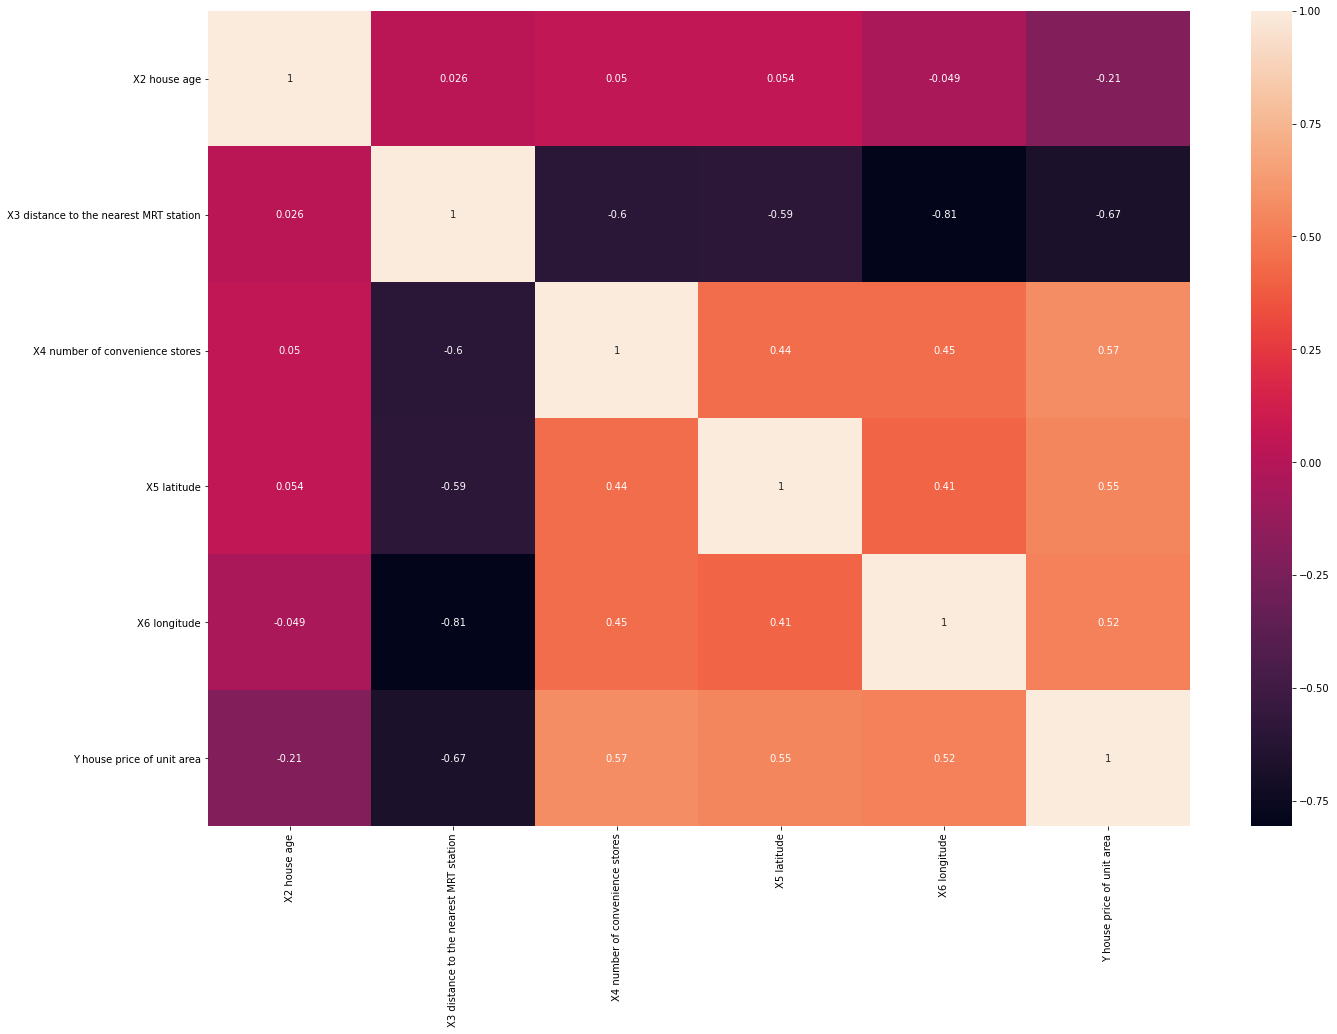

In [111]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr, annot=True, ax=ax)

X3 is correalted but in opposite direction other features are all highly correlated to the label so each feature is used in predicting the label.

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

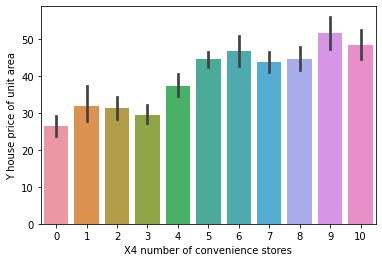

In [129]:
sns.barplot(x=raw_data_copy['X4 number of convenience stores'], y=raw_data_copy['Y house price of unit area'])

As X4 and Y are **positively correlated** so as one increases other also increases

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

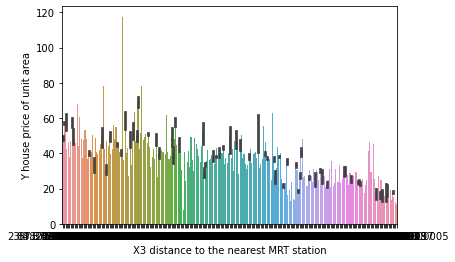

In [128]:
sns.barplot(x=raw_data_copy['X3 distance to the nearest MRT station'], y=raw_data_copy['Y house price of unit area'])

As already observed X3 and Y are **negatively correlated**  so as one increases other decreases.

In [113]:
data = PrepareData(raw_data_copy)

In [114]:
X_train , Y_train, X_test , Y_test = data.standardize()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
X_train.shape

(331, 6)

## Linear Regression Model

Line :
$$Y = \theta_0 + \theta_1.X $$

#### MSE(Mean Sqaurred Error):
    It is the average of squared error occurred between the predicted values and actual values. It can be written as:
$$ MSE = \frac{1}{2.n}\sum_{i=0}^{n} (Y_{true} - Y_{pred})^2$$

In [116]:
class Linear_Regressor:
    def __init__(self,X_train,Y_train,learning_rate,epsilon):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.Y_hat = None
        self.theta_initial = np.zeros((self.X_train.shape[1],1))
        self.theta_final =  np.zeros((self.X_train.shape[1],1))
        self.alpha = learning_rate
        self.e = epsilon
        self.m = self.X_train.shape[0]
        self.iteration = []
        self.residual_points = [0]
    def mse(self):
        '''
        Calculates the mean squared error for the algorithm.
        Return:
        Value of Mean Sqaured error. 
        '''
        self.Y_hat = np.matmul(self.X_train,self.theta_final)
        return (1/(2*self.m)) * np.sum(np.square(self.Y_hat - self.Y_train))
    def delta(self,p):
        '''
        Calculate the derivative of the loss function to required to perform gradient descent.
        Return: Value of the derivative.
        '''
        y_hat = np.dot(self.X_train, p)
        a = np.dot(self.X_train.T,(y_hat - self.Y_train))
        return  (2/self.m)*a
    def gradient_descent(self):
        '''
        Uses gradient descent algorithm to update the weights
        '''
        i=1
        while True:
            self.theta_final = self.theta_initial - (self.alpha) * self.delta(self.theta_initial)
            E = self.mse()
            self.residual_points.append(E)
            if E <= self.e or self.residual_points[i] == self.residual_points[i-1] or i >=349999:
                break

            self.iteration.append(i)
            self.theta_initial = self.theta_final
            print(f"Error:{E} Iterations: {i}")
            i+=1
    

In [117]:
learning_rate = 10**(-3)
e = 10**(-4)

In [118]:
lr = Linear_Regressor(X_train,Y_train,learning_rate,e)

In [119]:
lr.theta_initial.shape

(6, 1)

In [120]:
lr.theta_final.shape

(6, 1)

In [121]:
Y_train.shape

(331, 1)

In [122]:
X_test.shape

(83, 6)

In [123]:
lr.gradient_descent()

Error:811.056018860948 Iterations: 1
Error:807.6663925252778 Iterations: 2
Error:804.2937642324289 Iterations: 3
Error:800.9380288062533 Iterations: 4
Error:797.5990818920488 Iterations: 5
Error:794.2768199489574 Iterations: 6
Error:790.971140242442 Iterations: 7
Error:787.6819408368372 Iterations: 8
Error:784.4091205879765 Iterations: 9
Error:781.1525791358949 Iterations: 10
Error:777.9122168976025 Iterations: 11
Error:774.6879350599335 Iterations: 12
Error:771.4796355724659 Iterations: 13
Error:768.2872211405139 Iterations: 14
Error:765.1105952181894 Iterations: 15
Error:761.9496620015341 Iterations: 16
Error:758.8043264217217 Iterations: 17
Error:755.6744941383268 Iterations: 18
Error:752.5600715326628 Iterations: 19
Error:749.4609657011862 Iterations: 20
Error:746.3770844489668 Iterations: 21
Error:743.3083362832258 Iterations: 22
Error:740.2546304069353 Iterations: 23
Error:737.215876712485 Iterations: 24
Error:734.1919857754109 Iterations: 25
Error:731.1828688481875 Iterations: 2

Error:89.42749978356933 Iterations: 684
Error:89.23946293903876 Iterations: 685
Error:89.0521771074294 Iterations: 686
Error:88.86563926909699 Iterations: 687
Error:88.67984641670175 Iterations: 688
Error:88.49479555515668 Iterations: 689
Error:88.3104837015758 Iterations: 690
Error:88.12690788522295 Iterations: 691
Error:87.94406514746058 Iterations: 692
Error:87.76195254169897 Iterations: 693
Error:87.58056713334553 Iterations: 694
Error:87.39990599975438 Iterations: 695
Error:87.21996623017624 Iterations: 696
Error:87.04074492570835 Iterations: 697
Error:86.86223919924487 Iterations: 698
Error:86.68444617542721 Iterations: 699
Error:86.50736299059493 Iterations: 700
Error:86.33098679273657 Iterations: 701
Error:86.15531474144075 Iterations: 702
Error:85.98034400784773 Iterations: 703
Error:85.80607177460084 Iterations: 704
Error:85.63249523579839 Iterations: 705
Error:85.45961159694559 Iterations: 706
Error:85.28741807490704 Iterations: 707
Error:85.11591189785882 Iterations: 708
Er

Error:44.31505546773667 Iterations: 1459
Error:44.30635879864796 Iterations: 1460
Error:44.29769606944574 Iterations: 1461
Error:44.2890671454532 Iterations: 1462
Error:44.28047189253007 Iterations: 1463
Error:44.27191017707054 Iterations: 1464
Error:44.26338186600102 Iterations: 1465
Error:44.25488682677809 Iterations: 1466
Error:44.246424927386386 Iterations: 1467
Error:44.23799603633642 Iterations: 1468
Error:44.229600022662616 Iterations: 1469
Error:44.22123675592107 Iterations: 1470
Error:44.212906106187546 Iterations: 1471
Error:44.204607944055425 Iterations: 1472
Error:44.19634214063356 Iterations: 1473
Error:44.188108567544305 Iterations: 1474
Error:44.179907096921426 Iterations: 1475
Error:44.17173760140805 Iterations: 1476
Error:44.16359995415463 Iterations: 1477
Error:44.15549402881696 Iterations: 1478
Error:44.1474196995541 Iterations: 1479
Error:44.13937684102645 Iterations: 1480
Error:44.13136532839367 Iterations: 1481
Error:44.12338503731272 Iterations: 1482
Error:44.115

Error:42.16753283068496 Iterations: 2212
Error:42.16699188358114 Iterations: 2213
Error:42.16645270286682 Iterations: 2214
Error:42.1659152817948 Iterations: 2215
Error:42.165379613644554 Iterations: 2216
Error:42.164845691721965 Iterations: 2217
Error:42.16431350935933 Iterations: 2218
Error:42.16378305991523 Iterations: 2219
Error:42.16325433677437 Iterations: 2220
Error:42.162727333347554 Iterations: 2221
Error:42.16220204307153 Iterations: 2222
Error:42.161678459408904 Iterations: 2223
Error:42.16115657584806 Iterations: 2224
Error:42.16063638590301 Iterations: 2225
Error:42.160117883113315 Iterations: 2226
Error:42.159601061044 Iterations: 2227
Error:42.15908591328544 Iterations: 2228
Error:42.158572433453216 Iterations: 2229
Error:42.15806061518814 Iterations: 2230
Error:42.15755045215599 Iterations: 2231
Error:42.15704193804754 Iterations: 2232
Error:42.15653506657837 Iterations: 2233
Error:42.156029831488866 Iterations: 2234
Error:42.15552622654403 Iterations: 2235
Error:42.155

Error:41.996451546727904 Iterations: 2977
Error:41.99636216078339 Iterations: 2978
Error:41.99627290045773 Iterations: 2979
Error:41.9961837653966 Iterations: 2980
Error:41.99609475524701 Iterations: 2981
Error:41.996005869657225 Iterations: 2982
Error:41.99591710827682 Iterations: 2983
Error:41.99582847075666 Iterations: 2984
Error:41.995739956748864 Iterations: 2985
Error:41.99565156590685 Iterations: 2986
Error:41.99556329788526 Iterations: 2987
Error:41.99547515234007 Iterations: 2988
Error:41.99538712892845 Iterations: 2989
Error:41.99529922730886 Iterations: 2990
Error:41.995211447141 Iterations: 2991
Error:41.9951237880858 Iterations: 2992
Error:41.99503624980543 Iterations: 2993
Error:41.99494883196332 Iterations: 2994
Error:41.99486153422412 Iterations: 2995
Error:41.99477435625367 Iterations: 2996
Error:41.99468729771909 Iterations: 2997
Error:41.99460035828865 Iterations: 2998
Error:41.9945135376319 Iterations: 2999
Error:41.994426835419524 Iterations: 3000
Error:41.99434025

Error:41.95005893557998 Iterations: 3734
Error:41.95001495239413 Iterations: 3735
Error:41.94997099921606 Iterations: 3736
Error:41.94992707601245 Iterations: 3737
Error:41.94988318275009 Iterations: 3738
Error:41.94983931939581 Iterations: 3739
Error:41.94979548591653 Iterations: 3740
Error:41.94975168227924 Iterations: 3741
Error:41.94970790845103 Iterations: 3742
Error:41.94966416439906 Iterations: 3743
Error:41.94962045009053 Iterations: 3744
Error:41.949576765492765 Iterations: 3745
Error:41.949533110573114 Iterations: 3746
Error:41.949489485299075 Iterations: 3747
Error:41.949445889638135 Iterations: 3748
Error:41.94940232355792 Iterations: 3749
Error:41.94935878702609 Iterations: 3750
Error:41.94931528001041 Iterations: 3751
Error:41.949271802478705 Iterations: 3752
Error:41.94922835439886 Iterations: 3753
Error:41.94918493573886 Iterations: 3754
Error:41.94914154646676 Iterations: 3755
Error:41.94909818655064 Iterations: 3756
Error:41.94905485595875 Iterations: 3757
Error:41.94

Error:41.92323173211852 Iterations: 4506
Error:41.9232045197423 Iterations: 4507
Error:41.92317732347365 Iterations: 4508
Error:41.92315014330214 Iterations: 4509
Error:41.92312297921734 Iterations: 4510
Error:41.92309583120885 Iterations: 4511
Error:41.92306869926628 Iterations: 4512
Error:41.923041583379224 Iterations: 4513
Error:41.9230144835373 Iterations: 4514
Error:41.92298739973015 Iterations: 4515
Error:41.922960331947394 Iterations: 4516
Error:41.92293328017869 Iterations: 4517
Error:41.92290624441369 Iterations: 4518
Error:41.92287922464206 Iterations: 4519
Error:41.922852220853486 Iterations: 4520
Error:41.92282523303764 Iterations: 4521
Error:41.92279826118421 Iterations: 4522
Error:41.92277130528293 Iterations: 4523
Error:41.922744365323474 Iterations: 4524
Error:41.922717441295596 Iterations: 4525
Error:41.922690533189005 Iterations: 4526
Error:41.92266364099346 Iterations: 4527
Error:41.9226367646987 Iterations: 4528
Error:41.922609904294475 Iterations: 4529
Error:41.922

Error:41.906699084189164 Iterations: 5257
Error:41.90668154584528 Iterations: 5258
Error:41.90666401768767 Iterations: 5259
Error:41.90664649971025 Iterations: 5260
Error:41.90662899190706 Iterations: 5261
Error:41.90661149427209 Iterations: 5262
Error:41.90659400679936 Iterations: 5263
Error:41.90657652948285 Iterations: 5264
Error:41.90655906231656 Iterations: 5265
Error:41.90654160529452 Iterations: 5266
Error:41.90652415841075 Iterations: 5267
Error:41.906506721659255 Iterations: 5268
Error:41.906489295034056 Iterations: 5269
Error:41.9064718785292 Iterations: 5270
Error:41.906454472138705 Iterations: 5271
Error:41.9064370758566 Iterations: 5272
Error:41.90641968967694 Iterations: 5273
Error:41.90640231359376 Iterations: 5274
Error:41.9063849476011 Iterations: 5275
Error:41.90636759169302 Iterations: 5276
Error:41.90635024586357 Iterations: 5277
Error:41.90633291010679 Iterations: 5278
Error:41.90631558441677 Iterations: 5279
Error:41.90629826878756 Iterations: 5280
Error:41.906280

Error:41.8957816942786 Iterations: 6029
Error:41.89577048341917 Iterations: 6030
Error:41.89575927904778 Iterations: 6031
Error:41.89574808116066 Iterations: 6032
Error:41.89573688975403 Iterations: 6033
Error:41.895725704824166 Iterations: 6034
Error:41.89571452636728 Iterations: 6035
Error:41.8957033543796 Iterations: 6036
Error:41.89569218885739 Iterations: 6037
Error:41.89568102979691 Iterations: 6038
Error:41.89566987719437 Iterations: 6039
Error:41.89565873104605 Iterations: 6040
Error:41.89564759134819 Iterations: 6041
Error:41.89563645809705 Iterations: 6042
Error:41.89562533128888 Iterations: 6043
Error:41.895614210919945 Iterations: 6044
Error:41.895603096986505 Iterations: 6045
Error:41.89559198948481 Iterations: 6046
Error:41.89558088841115 Iterations: 6047
Error:41.89556979376179 Iterations: 6048
Error:41.895558705532984 Iterations: 6049
Error:41.89554762372101 Iterations: 6050
Error:41.89553654832215 Iterations: 6051
Error:41.89552547933267 Iterations: 6052
Error:41.89551

Error:41.88886447796176 Iterations: 6792
Error:41.88885726845135 Iterations: 6793
Error:41.88885006310998 Iterations: 6794
Error:41.8888428619352 Iterations: 6795
Error:41.888835664924656 Iterations: 6796
Error:41.88882847207588 Iterations: 6797
Error:41.888821283386505 Iterations: 6798
Error:41.88881409885409 Iterations: 6799
Error:41.888806918476256 Iterations: 6800
Error:41.88879974225058 Iterations: 6801
Error:41.88879257017468 Iterations: 6802
Error:41.88878540224613 Iterations: 6803
Error:41.88877823846256 Iterations: 6804
Error:41.888771078821534 Iterations: 6805
Error:41.888763923320674 Iterations: 6806
Error:41.888756771957596 Iterations: 6807
Error:41.88874962472989 Iterations: 6808
Error:41.888742481635155 Iterations: 6809
Error:41.88873534267102 Iterations: 6810
Error:41.888728207835086 Iterations: 6811
Error:41.88872107712495 Iterations: 6812
Error:41.88871395053823 Iterations: 6813
Error:41.88870682807256 Iterations: 6814
Error:41.88869970972555 Iterations: 6815
Error:41.

Error:41.88452775085135 Iterations: 7531
Error:41.88452304884832 Iterations: 7532
Error:41.884518349563784 Iterations: 7533
Error:41.88451365299614 Iterations: 7534
Error:41.88450895914383 Iterations: 7535
Error:41.88450426800531 Iterations: 7536
Error:41.88449957957898 Iterations: 7537
Error:41.88449489386326 Iterations: 7538
Error:41.88449021085663 Iterations: 7539
Error:41.884485530557484 Iterations: 7540
Error:41.884480852964266 Iterations: 7541
Error:41.884476178075424 Iterations: 7542
Error:41.88447150588938 Iterations: 7543
Error:41.88446683640456 Iterations: 7544
Error:41.88446216961944 Iterations: 7545
Error:41.88445750553242 Iterations: 7546
Error:41.88445284414196 Iterations: 7547
Error:41.88444818544651 Iterations: 7548
Error:41.88444352944447 Iterations: 7549
Error:41.884438876134325 Iterations: 7550
Error:41.8844342255145 Iterations: 7551
Error:41.88442957758345 Iterations: 7552
Error:41.8844249323396 Iterations: 7553
Error:41.88442028978141 Iterations: 7554
Error:41.8844

Error:41.881647391028245 Iterations: 8287
Error:41.88164435426532 Iterations: 8288
Error:41.88164131925801 Iterations: 8289
Error:41.881638286005305 Iterations: 8290
Error:41.88163525450619 Iterations: 8291
Error:41.881632224759656 Iterations: 8292
Error:41.88162919676469 Iterations: 8293
Error:41.881626170520285 Iterations: 8294
Error:41.8816231460254 Iterations: 8295
Error:41.88162012327906 Iterations: 8296
Error:41.881617102280224 Iterations: 8297
Error:41.88161408302791 Iterations: 8298
Error:41.88161106552109 Iterations: 8299
Error:41.881608049758746 Iterations: 8300
Error:41.8816050357399 Iterations: 8301
Error:41.88160202346353 Iterations: 8302
Error:41.881599012928596 Iterations: 8303
Error:41.88159600413415 Iterations: 8304
Error:41.88159299707914 Iterations: 8305
Error:41.88158999176258 Iterations: 8306
Error:41.88158698818347 Iterations: 8307
Error:41.88158398634078 Iterations: 8308
Error:41.88158098623354 Iterations: 8309
Error:41.881577987860716 Iterations: 8310
Error:41.8

Error:41.8797442248018 Iterations: 9065
Error:41.87974228829351 Iterations: 9066
Error:41.87974035290474 Iterations: 9067
Error:41.87973841863485 Iterations: 9068
Error:41.87973648548319 Iterations: 9069
Error:41.87973455344911 Iterations: 9070
Error:41.879732622531975 Iterations: 9071
Error:41.87973069273114 Iterations: 9072
Error:41.87972876404593 Iterations: 9073
Error:41.879726836475726 Iterations: 9074
Error:41.87972491001988 Iterations: 9075
Error:41.87972298467774 Iterations: 9076
Error:41.87972106044868 Iterations: 9077
Error:41.87971913733203 Iterations: 9078
Error:41.87971721532718 Iterations: 9079
Error:41.87971529443345 Iterations: 9080
Error:41.87971337465023 Iterations: 9081
Error:41.87971145597686 Iterations: 9082
Error:41.8797095384127 Iterations: 9083
Error:41.87970762195711 Iterations: 9084
Error:41.879705706609464 Iterations: 9085
Error:41.87970379236909 Iterations: 9086
Error:41.87970187923538 Iterations: 9087
Error:41.87969996720767 Iterations: 9088
Error:41.879698

Error:41.878570491431745 Iterations: 9811
Error:41.87856923347423 Iterations: 9812
Error:41.87856797624395 Iterations: 9813
Error:41.87856671974049 Iterations: 9814
Error:41.87856546396343 Iterations: 9815
Error:41.87856420891236 Iterations: 9816
Error:41.87856295458685 Iterations: 9817
Error:41.87856170098647 Iterations: 9818
Error:41.87856044811081 Iterations: 9819
Error:41.87855919595947 Iterations: 9820
Error:41.878557944532 Iterations: 9821
Error:41.878556693827996 Iterations: 9822
Error:41.87855544384705 Iterations: 9823
Error:41.87855419458872 Iterations: 9824
Error:41.8785529460526 Iterations: 9825
Error:41.87855169823829 Iterations: 9826
Error:41.87855045114534 Iterations: 9827
Error:41.878549204773364 Iterations: 9828
Error:41.878547959121924 Iterations: 9829
Error:41.87854671419062 Iterations: 9830
Error:41.87854546997901 Iterations: 9831
Error:41.8785442264867 Iterations: 9832
Error:41.87854298371326 Iterations: 9833
Error:41.87854174165831 Iterations: 9834
Error:41.8785405

Error:41.87778211629553 Iterations: 10589
Error:41.8777813141071 Iterations: 10590
Error:41.87778051238244 Iterations: 10591
Error:41.87777971112126 Iterations: 10592
Error:41.8777789103233 Iterations: 10593
Error:41.87777810998829 Iterations: 10594
Error:41.87777731011597 Iterations: 10595
Error:41.87777651070607 Iterations: 10596
Error:41.877775711758304 Iterations: 10597
Error:41.877774913272425 Iterations: 10598
Error:41.877774115248165 Iterations: 10599
Error:41.87777331768524 Iterations: 10600
Error:41.8777725205834 Iterations: 10601
Error:41.877771723942374 Iterations: 10602
Error:41.877770927761894 Iterations: 10603
Error:41.87777013204171 Iterations: 10604
Error:41.87776933678153 Iterations: 10605
Error:41.8777685419811 Iterations: 10606
Error:41.87776774764014 Iterations: 10607
Error:41.87776695375842 Iterations: 10608
Error:41.87776616033564 Iterations: 10609
Error:41.87776536737155 Iterations: 10610
Error:41.87776457486588 Iterations: 10611
Error:41.87776378281837 Iteration

Error:41.877258643544934 Iterations: 11408
Error:41.87725814398219 Iterations: 11409
Error:41.87725764470826 Iterations: 11410
Error:41.877257145722965 Iterations: 11411
Error:41.87725664702614 Iterations: 11412
Error:41.87725614861762 Iterations: 11413
Error:41.877255650497226 Iterations: 11414
Error:41.87725515266481 Iterations: 11415
Error:41.87725465512018 Iterations: 11416
Error:41.877254157863206 Iterations: 11417
Error:41.87725366089369 Iterations: 11418
Error:41.877253164211496 Iterations: 11419
Error:41.877252667816414 Iterations: 11420
Error:41.87725217170833 Iterations: 11421
Error:41.87725167588703 Iterations: 11422
Error:41.877251180352374 Iterations: 11423
Error:41.87725068510421 Iterations: 11424
Error:41.877250190142334 Iterations: 11425
Error:41.8772496954666 Iterations: 11426
Error:41.877249201076864 Iterations: 11427
Error:41.87724870697292 Iterations: 11428
Error:41.87724821315464 Iterations: 11429
Error:41.87724771962183 Iterations: 11430
Error:41.87724722637434 It

Error:41.87693483370626 Iterations: 12220
Error:41.87693452134172 Iterations: 12221
Error:41.87693420915777 Iterations: 12222
Error:41.8769338971543 Iterations: 12223
Error:41.876933585331194 Iterations: 12224
Error:41.876933273688365 Iterations: 12225
Error:41.8769329622257 Iterations: 12226
Error:41.87693265094309 Iterations: 12227
Error:41.87693233984045 Iterations: 12228
Error:41.87693202891764 Iterations: 12229
Error:41.87693171817459 Iterations: 12230
Error:41.87693140761119 Iterations: 12231
Error:41.87693109722731 Iterations: 12232
Error:41.87693078702288 Iterations: 12233
Error:41.876930476997785 Iterations: 12234
Error:41.87693016715192 Iterations: 12235
Error:41.876929857485166 Iterations: 12236
Error:41.876929547997456 Iterations: 12237
Error:41.87692923868865 Iterations: 12238
Error:41.87692892955867 Iterations: 12239
Error:41.87692862060738 Iterations: 12240
Error:41.87692831183472 Iterations: 12241
Error:41.87692800324056 Iterations: 12242
Error:41.8769276948248 Iteratio

Error:41.87675206244726 Iterations: 12934
Error:41.8767518557449 Iterations: 12935
Error:41.876751649162046 Iterations: 12936
Error:41.8767514426986 Iterations: 12937
Error:41.87675123635452 Iterations: 12938
Error:41.87675103012973 Iterations: 12939
Error:41.876750824024164 Iterations: 12940
Error:41.87675061803774 Iterations: 12941
Error:41.876750412170416 Iterations: 12942
Error:41.87675020642209 Iterations: 12943
Error:41.876750000792725 Iterations: 12944
Error:41.87674979528222 Iterations: 12945
Error:41.87674958989054 Iterations: 12946
Error:41.87674938461759 Iterations: 12947
Error:41.87674917946331 Iterations: 12948
Error:41.87674897442765 Iterations: 12949
Error:41.8767487695105 Iterations: 12950
Error:41.876748564711825 Iterations: 12951
Error:41.87674836003154 Iterations: 12952
Error:41.87674815546958 Iterations: 12953
Error:41.87674795102589 Iterations: 12954
Error:41.87674774670038 Iterations: 12955
Error:41.876747542493014 Iterations: 12956
Error:41.87674733840368 Iterati

Error:41.87662251988941 Iterations: 13712
Error:41.87662238807708 Iterations: 13713
Error:41.876622256340966 Iterations: 13714
Error:41.876622124681006 Iterations: 13715
Error:41.876621993097174 Iterations: 13716
Error:41.87662186158939 Iterations: 13717
Error:41.87662173015765 Iterations: 13718
Error:41.87662159880188 Iterations: 13719
Error:41.87662146752206 Iterations: 13720
Error:41.87662133631813 Iterations: 13721
Error:41.87662120519004 Iterations: 13722
Error:41.876621074137766 Iterations: 13723
Error:41.87662094316125 Iterations: 13724
Error:41.87662081226046 Iterations: 13725
Error:41.87662068143534 Iterations: 13726
Error:41.87662055068585 Iterations: 13727
Error:41.876620420011946 Iterations: 13728
Error:41.87662028941359 Iterations: 13729
Error:41.87662015889074 Iterations: 13730
Error:41.87662002844335 Iterations: 13731
Error:41.87661989807136 Iterations: 13732
Error:41.87661976777474 Iterations: 13733
Error:41.87661963755346 Iterations: 13734
Error:41.87661950740744 Itera

Error:41.87653882277414 Iterations: 14503
Error:41.87653873934809 Iterations: 14504
Error:41.87653865597027 Iterations: 14505
Error:41.87653857264065 Iterations: 14506
Error:41.8765384893592 Iterations: 14507
Error:41.876538406125896 Iterations: 14508
Error:41.87653832294071 Iterations: 14509
Error:41.876538239803615 Iterations: 14510
Error:41.87653815671458 Iterations: 14511
Error:41.876538073673586 Iterations: 14512
Error:41.8765379906806 Iterations: 14513
Error:41.87653790773559 Iterations: 14514
Error:41.876537824838536 Iterations: 14515
Error:41.876537741989395 Iterations: 14516
Error:41.87653765918815 Iterations: 14517
Error:41.876537576434785 Iterations: 14518
Error:41.87653749372926 Iterations: 14519
Error:41.876537411071546 Iterations: 14520
Error:41.87653732846161 Iterations: 14521
Error:41.876537245899435 Iterations: 14522
Error:41.87653716338499 Iterations: 14523
Error:41.876537080918254 Iterations: 14524
Error:41.876536998499176 Iterations: 14525
Error:41.87653691612777 It

Error:41.87648766312161 Iterations: 15260
Error:41.87648760927154 Iterations: 15261
Error:41.876487555452606 Iterations: 15262
Error:41.876487501664776 Iterations: 15263
Error:41.876487447908055 Iterations: 15264
Error:41.87648739418239 Iterations: 15265
Error:41.87648734048781 Iterations: 15266
Error:41.87648728682426 Iterations: 15267
Error:41.87648723319173 Iterations: 15268
Error:41.87648717959021 Iterations: 15269
Error:41.876487126019676 Iterations: 15270
Error:41.8764870724801 Iterations: 15271
Error:41.876487018971496 Iterations: 15272
Error:41.87648696549381 Iterations: 15273
Error:41.87648691204705 Iterations: 15274
Error:41.87648685863119 Iterations: 15275
Error:41.8764868052462 Iterations: 15276
Error:41.87648675189209 Iterations: 15277
Error:41.876486698568804 Iterations: 15278
Error:41.87648664527636 Iterations: 15279
Error:41.87648659201472 Iterations: 15280
Error:41.87648653878388 Iterations: 15281
Error:41.87648648558379 Iterations: 15282
Error:41.87648643241447 Iterat

Error:41.8764540522711 Iterations: 16034
Error:41.87645401785184 Iterations: 16035
Error:41.876453983452485 Iterations: 16036
Error:41.876453949073024 Iterations: 16037
Error:41.87645391471343 Iterations: 16038
Error:41.87645388037372 Iterations: 16039
Error:41.876453846053835 Iterations: 16040
Error:41.876453811753805 Iterations: 16041
Error:41.8764537774736 Iterations: 16042
Error:41.87645374321322 Iterations: 16043
Error:41.87645370897263 Iterations: 16044
Error:41.87645367475185 Iterations: 16045
Error:41.87645364055084 Iterations: 16046
Error:41.87645360636962 Iterations: 16047
Error:41.876453572208156 Iterations: 16048
Error:41.876453538066436 Iterations: 16049
Error:41.87645350394445 Iterations: 16050
Error:41.87645346984219 Iterations: 16051
Error:41.87645343575965 Iterations: 16052
Error:41.876453401696814 Iterations: 16053
Error:41.87645336765366 Iterations: 16054
Error:41.87645333363021 Iterations: 16055
Error:41.87645329962641 Iterations: 16056
Error:41.87645326564227 Itera

Error:41.87643191479766 Iterations: 16838
Error:41.87643189317634 Iterations: 16839
Error:41.87643187156751 Iterations: 16840
Error:41.87643184997118 Iterations: 16841
Error:41.87643182838735 Iterations: 16842
Error:41.87643180681598 Iterations: 16843
Error:41.876431785257076 Iterations: 16844
Error:41.87643176371065 Iterations: 16845
Error:41.87643174217666 Iterations: 16846
Error:41.87643172065515 Iterations: 16847
Error:41.87643169914605 Iterations: 16848
Error:41.87643167764941 Iterations: 16849
Error:41.87643165616519 Iterations: 16850
Error:41.876431634693375 Iterations: 16851
Error:41.876431613234 Iterations: 16852
Error:41.876431591787004 Iterations: 16853
Error:41.87643157035242 Iterations: 16854
Error:41.87643154893021 Iterations: 16855
Error:41.87643152752041 Iterations: 16856
Error:41.876431506122984 Iterations: 16857
Error:41.87643148473793 Iterations: 16858
Error:41.87643146336522 Iterations: 16859
Error:41.876431442004886 Iterations: 16860
Error:41.876431420656886 Iterat

Error:41.87641775186497 Iterations: 17661
Error:41.87641773843139 Iterations: 17662
Error:41.876417725005595 Iterations: 17663
Error:41.876417711587564 Iterations: 17664
Error:41.876417698177285 Iterations: 17665
Error:41.87641768477475 Iterations: 17666
Error:41.87641767137996 Iterations: 17667
Error:41.87641765799293 Iterations: 17668
Error:41.876417644613625 Iterations: 17669
Error:41.87641763124208 Iterations: 17670
Error:41.87641761787823 Iterations: 17671
Error:41.876417604522125 Iterations: 17672
Error:41.876417591173734 Iterations: 17673
Error:41.87641757783307 Iterations: 17674
Error:41.87641756450011 Iterations: 17675
Error:41.87641755117486 Iterations: 17676
Error:41.87641753785732 Iterations: 17677
Error:41.87641752454747 Iterations: 17678
Error:41.876417511245315 Iterations: 17679
Error:41.876417497950854 Iterations: 17680
Error:41.876417484664074 Iterations: 17681
Error:41.87641747138498 Iterations: 17682
Error:41.876417458113565 Iterations: 17683
Error:41.876417444849814

Error:41.87640918794792 Iterations: 18456
Error:41.87640917946525 Iterations: 18457
Error:41.876409170987486 Iterations: 18458
Error:41.87640916251462 Iterations: 18459
Error:41.87640915404667 Iterations: 18460
Error:41.87640914558359 Iterations: 18461
Error:41.876409137125414 Iterations: 18462
Error:41.87640912867212 Iterations: 18463
Error:41.87640912022373 Iterations: 18464
Error:41.87640911178021 Iterations: 18465
Error:41.87640910334158 Iterations: 18466
Error:41.876409094907814 Iterations: 18467
Error:41.87640908647894 Iterations: 18468
Error:41.87640907805492 Iterations: 18469
Error:41.87640906963579 Iterations: 18470
Error:41.876409061221516 Iterations: 18471
Error:41.87640905281212 Iterations: 18472
Error:41.876409044407566 Iterations: 18473
Error:41.876409036007885 Iterations: 18474
Error:41.876409027613064 Iterations: 18475
Error:41.87640901922308 Iterations: 18476
Error:41.87640901083795 Iterations: 18477
Error:41.87640900245767 Iterations: 18478
Error:41.87640899408225 Ite

Error:41.876403673693815 Iterations: 19271
Error:41.87640366839901 Iterations: 19272
Error:41.876403663107254 Iterations: 19273
Error:41.87640365781856 Iterations: 19274
Error:41.876403652532915 Iterations: 19275
Error:41.87640364725033 Iterations: 19276
Error:41.8764036419708 Iterations: 19277
Error:41.87640363669433 Iterations: 19278
Error:41.87640363142091 Iterations: 19279
Error:41.87640362615053 Iterations: 19280
Error:41.8764036208832 Iterations: 19281
Error:41.87640361561891 Iterations: 19282
Error:41.87640361035768 Iterations: 19283
Error:41.87640360509947 Iterations: 19284
Error:41.876403599844316 Iterations: 19285
Error:41.8764035945922 Iterations: 19286
Error:41.87640358934311 Iterations: 19287
Error:41.876403584097055 Iterations: 19288
Error:41.876403578854045 Iterations: 19289
Error:41.87640357361406 Iterations: 19290
Error:41.8764035683771 Iterations: 19291
Error:41.87640356314318 Iterations: 19292
Error:41.87640355791227 Iterations: 19293
Error:41.87640355268439 Iteratio

Error:41.87639986083077 Iterations: 20202
Error:41.876399857740225 Iterations: 20203
Error:41.87639985465145 Iterations: 20204
Error:41.876399851564464 Iterations: 20205
Error:41.876399848479274 Iterations: 20206
Error:41.87639984539585 Iterations: 20207
Error:41.87639984231423 Iterations: 20208
Error:41.876399839234374 Iterations: 20209
Error:41.87639983615631 Iterations: 20210
Error:41.87639983308001 Iterations: 20211
Error:41.876399830005504 Iterations: 20212
Error:41.876399826932776 Iterations: 20213
Error:41.87639982386182 Iterations: 20214
Error:41.876399820792635 Iterations: 20215
Error:41.87639981772522 Iterations: 20216
Error:41.876399814659585 Iterations: 20217
Error:41.87639981159573 Iterations: 20218
Error:41.87639980853364 Iterations: 20219
Error:41.87639980547332 Iterations: 20220
Error:41.87639980241477 Iterations: 20221
Error:41.876399799357976 Iterations: 20222
Error:41.87639979630296 Iterations: 20223
Error:41.87639979324971 Iterations: 20224
Error:41.87639979019823 I

Error:41.87639808536383 Iterations: 20900
Error:41.87639808329969 Iterations: 20901
Error:41.87639808123675 Iterations: 20902
Error:41.876398079175 Iterations: 20903
Error:41.87639807711444 Iterations: 20904
Error:41.87639807505508 Iterations: 20905
Error:41.876398072996906 Iterations: 20906
Error:41.8763980709399 Iterations: 20907
Error:41.876398068884114 Iterations: 20908
Error:41.8763980668295 Iterations: 20909
Error:41.87639806477609 Iterations: 20910
Error:41.87639806272385 Iterations: 20911
Error:41.8763980606728 Iterations: 20912
Error:41.87639805862293 Iterations: 20913
Error:41.87639805657425 Iterations: 20914
Error:41.87639805452676 Iterations: 20915
Error:41.87639805248045 Iterations: 20916
Error:41.87639805043533 Iterations: 20917
Error:41.87639804839139 Iterations: 20918
Error:41.87639804634862 Iterations: 20919
Error:41.876398044307045 Iterations: 20920
Error:41.87639804226665 Iterations: 20921
Error:41.87639804022742 Iterations: 20922
Error:41.876398038189386 Iterations:

Error:41.87639679966139 Iterations: 21672
Error:41.87639679834053 Iterations: 21673
Error:41.87639679702044 Iterations: 21674
Error:41.876396795701105 Iterations: 21675
Error:41.87639679438254 Iterations: 21676
Error:41.87639679306474 Iterations: 21677
Error:41.876396791747695 Iterations: 21678
Error:41.87639679043141 Iterations: 21679
Error:41.87639678911589 Iterations: 21680
Error:41.876396787801134 Iterations: 21681
Error:41.87639678648713 Iterations: 21682
Error:41.876396785173895 Iterations: 21683
Error:41.87639678386141 Iterations: 21684
Error:41.87639678254969 Iterations: 21685
Error:41.87639678123872 Iterations: 21686
Error:41.87639677992852 Iterations: 21687
Error:41.876396778619075 Iterations: 21688
Error:41.87639677731037 Iterations: 21689
Error:41.87639677600244 Iterations: 21690
Error:41.87639677469525 Iterations: 21691
Error:41.87639677338883 Iterations: 21692
Error:41.87639677208316 Iterations: 21693
Error:41.87639677077825 Iterations: 21694
Error:41.8763967694741 Iterat

Error:41.87639597608513 Iterations: 22445
Error:41.87639597524038 Iterations: 22446
Error:41.876395974396125 Iterations: 22447
Error:41.87639597355236 Iterations: 22448
Error:41.87639597270908 Iterations: 22449
Error:41.87639597186631 Iterations: 22450
Error:41.876395971024 Iterations: 22451
Error:41.876395970182195 Iterations: 22452
Error:41.87639596934087 Iterations: 22453
Error:41.876395968500034 Iterations: 22454
Error:41.876395967659676 Iterations: 22455
Error:41.87639596681981 Iterations: 22456
Error:41.87639596598043 Iterations: 22457
Error:41.87639596514153 Iterations: 22458
Error:41.87639596430312 Iterations: 22459
Error:41.87639596346519 Iterations: 22460
Error:41.876395962627754 Iterations: 22461
Error:41.876395961790784 Iterations: 22462
Error:41.87639596095431 Iterations: 22463
Error:41.87639596011833 Iterations: 22464
Error:41.87639595928282 Iterations: 22465
Error:41.876395958447794 Iterations: 22466
Error:41.87639595761326 Iterations: 22467
Error:41.87639595677919 Itera

Error:41.876395455340216 Iterations: 23207
Error:41.876395454796516 Iterations: 23208
Error:41.87639545425316 Iterations: 23209
Error:41.87639545371009 Iterations: 23210
Error:41.87639545316735 Iterations: 23211
Error:41.87639545262491 Iterations: 23212
Error:41.87639545208279 Iterations: 23213
Error:41.87639545154099 Iterations: 23214
Error:41.87639545099949 Iterations: 23215
Error:41.876395450458304 Iterations: 23216
Error:41.876395449917446 Iterations: 23217
Error:41.876395449376886 Iterations: 23218
Error:41.87639544883665 Iterations: 23219
Error:41.87639544829672 Iterations: 23220
Error:41.8763954477571 Iterations: 23221
Error:41.8763954472178 Iterations: 23222
Error:41.8763954466788 Iterations: 23223
Error:41.876395446140116 Iterations: 23224
Error:41.87639544560175 Iterations: 23225
Error:41.876395445063686 Iterations: 23226
Error:41.876395444525926 Iterations: 23227
Error:41.87639544398851 Iterations: 23228
Error:41.87639544345138 Iterations: 23229
Error:41.87639544291456 Itera

Error:41.876395115993084 Iterations: 23981
Error:41.87639511564558 Iterations: 23982
Error:41.87639511529827 Iterations: 23983
Error:41.87639511495116 Iterations: 23984
Error:41.87639511460425 Iterations: 23985
Error:41.87639511425755 Iterations: 23986
Error:41.876395113911045 Iterations: 23987
Error:41.87639511356474 Iterations: 23988
Error:41.87639511321864 Iterations: 23989
Error:41.876395112872736 Iterations: 23990
Error:41.87639511252703 Iterations: 23991
Error:41.87639511218151 Iterations: 23992
Error:41.87639511183621 Iterations: 23993
Error:41.87639511149111 Iterations: 23994
Error:41.876395111146195 Iterations: 23995
Error:41.8763951108015 Iterations: 23996
Error:41.876395110456976 Iterations: 23997
Error:41.876395110112675 Iterations: 23998
Error:41.876395109768566 Iterations: 23999
Error:41.87639510942466 Iterations: 24000
Error:41.87639510908095 Iterations: 24001
Error:41.876395108737434 Iterations: 24002
Error:41.87639510839412 Iterations: 24003
Error:41.876395108051 Itera

Error:41.87639490446272 Iterations: 24731
Error:41.8763949042375 Iterations: 24732
Error:41.876394904012415 Iterations: 24733
Error:41.87639490378745 Iterations: 24734
Error:41.87639490356263 Iterations: 24735
Error:41.87639490333792 Iterations: 24736
Error:41.876394903113344 Iterations: 24737
Error:41.876394902888904 Iterations: 24738
Error:41.8763949026646 Iterations: 24739
Error:41.87639490244041 Iterations: 24740
Error:41.876394902216354 Iterations: 24741
Error:41.87639490199244 Iterations: 24742
Error:41.87639490176864 Iterations: 24743
Error:41.876394901544984 Iterations: 24744
Error:41.876394901321454 Iterations: 24745
Error:41.876394901098045 Iterations: 24746
Error:41.87639490087477 Iterations: 24747
Error:41.876394900651626 Iterations: 24748
Error:41.87639490042861 Iterations: 24749
Error:41.87639490020572 Iterations: 24750
Error:41.87639489998296 Iterations: 24751
Error:41.87639489976033 Iterations: 24752
Error:41.87639489953783 Iterations: 24753
Error:41.87639489931545 Iter

Error:41.87639476432209 Iterations: 25502
Error:41.87639476417788 Iterations: 25503
Error:41.87639476403377 Iterations: 25504
Error:41.87639476388973 Iterations: 25505
Error:41.87639476374578 Iterations: 25506
Error:41.876394763601894 Iterations: 25507
Error:41.87639476345812 Iterations: 25508
Error:41.87639476331441 Iterations: 25509
Error:41.876394763170794 Iterations: 25510
Error:41.876394763027264 Iterations: 25511
Error:41.8763947628838 Iterations: 25512
Error:41.87639476274042 Iterations: 25513
Error:41.87639476259713 Iterations: 25514
Error:41.87639476245393 Iterations: 25515
Error:41.8763947623108 Iterations: 25516
Error:41.87639476216777 Iterations: 25517
Error:41.8763947620248 Iterations: 25518
Error:41.876394761881926 Iterations: 25519
Error:41.87639476173914 Iterations: 25520
Error:41.87639476159643 Iterations: 25521
Error:41.876394761453795 Iterations: 25522
Error:41.87639476131125 Iterations: 25523
Error:41.8763947611688 Iterations: 25524
Error:41.876394761026404 Iteratio

Error:41.8763946743163 Iterations: 26276
Error:41.87639467422413 Iterations: 26277
Error:41.876394674132015 Iterations: 26278
Error:41.87639467403995 Iterations: 26279
Error:41.87639467394794 Iterations: 26280
Error:41.876394673855984 Iterations: 26281
Error:41.87639467376409 Iterations: 26282
Error:41.87639467367222 Iterations: 26283
Error:41.87639467358043 Iterations: 26284
Error:41.87639467348868 Iterations: 26285
Error:41.876394673396995 Iterations: 26286
Error:41.87639467330535 Iterations: 26287
Error:41.876394673213774 Iterations: 26288
Error:41.87639467312223 Iterations: 26289
Error:41.87639467303075 Iterations: 26290
Error:41.876394672939334 Iterations: 26291
Error:41.87639467284795 Iterations: 26292
Error:41.87639467275663 Iterations: 26293
Error:41.87639467266536 Iterations: 26294
Error:41.876394672574136 Iterations: 26295
Error:41.87639467248298 Iterations: 26296
Error:41.87639467239187 Iterations: 26297
Error:41.8763946723008 Iterations: 26298
Error:41.876394672209805 Itera

Error:41.876394616375784 Iterations: 27057
Error:41.87639461631713 Iterations: 27058
Error:41.87639461625848 Iterations: 27059
Error:41.876394616199875 Iterations: 27060
Error:41.8763946161413 Iterations: 27061
Error:41.87639461608276 Iterations: 27062
Error:41.87639461602425 Iterations: 27063
Error:41.87639461596578 Iterations: 27064
Error:41.87639461590735 Iterations: 27065
Error:41.87639461584895 Iterations: 27066
Error:41.87639461579057 Iterations: 27067
Error:41.87639461573224 Iterations: 27068
Error:41.87639461567394 Iterations: 27069
Error:41.876394615615666 Iterations: 27070
Error:41.87639461555742 Iterations: 27071
Error:41.87639461549924 Iterations: 27072
Error:41.876394615441065 Iterations: 27073
Error:41.87639461538293 Iterations: 27074
Error:41.87639461532483 Iterations: 27075
Error:41.876394615266776 Iterations: 27076
Error:41.87639461520873 Iterations: 27077
Error:41.87639461515072 Iterations: 27078
Error:41.876394615092764 Iterations: 27079
Error:41.87639461503483 Itera

Error:41.876394579305135 Iterations: 27843
Error:41.87639457926789 Iterations: 27844
Error:41.87639457923068 Iterations: 27845
Error:41.876394579193466 Iterations: 27846
Error:41.87639457915628 Iterations: 27847
Error:41.876394579119136 Iterations: 27848
Error:41.876394579081996 Iterations: 27849
Error:41.87639457904489 Iterations: 27850
Error:41.87639457900779 Iterations: 27851
Error:41.87639457897072 Iterations: 27852
Error:41.87639457893366 Iterations: 27853
Error:41.87639457889664 Iterations: 27854
Error:41.87639457885963 Iterations: 27855
Error:41.87639457882264 Iterations: 27856
Error:41.87639457878568 Iterations: 27857
Error:41.876394578748744 Iterations: 27858
Error:41.87639457871182 Iterations: 27859
Error:41.87639457867491 Iterations: 27860
Error:41.87639457863803 Iterations: 27861
Error:41.87639457860118 Iterations: 27862
Error:41.876394578564344 Iterations: 27863
Error:41.87639457852753 Iterations: 27864
Error:41.87639457849074 Iterations: 27865
Error:41.87639457845396 Iter

Error:41.876394556490204 Iterations: 28599
Error:41.87639455646615 Iterations: 28600
Error:41.876394556442115 Iterations: 28601
Error:41.876394556418084 Iterations: 28602
Error:41.87639455639407 Iterations: 28603
Error:41.87639455637007 Iterations: 28604
Error:41.87639455634609 Iterations: 28605
Error:41.87639455632212 Iterations: 28606
Error:41.87639455629816 Iterations: 28607
Error:41.87639455627422 Iterations: 28608
Error:41.8763945562503 Iterations: 28609
Error:41.87639455622638 Iterations: 28610
Error:41.87639455620247 Iterations: 28611
Error:41.87639455617858 Iterations: 28612
Error:41.87639455615472 Iterations: 28613
Error:41.87639455613086 Iterations: 28614
Error:41.876394556107 Iterations: 28615
Error:41.87639455608317 Iterations: 28616
Error:41.876394556059346 Iterations: 28617
Error:41.87639455603556 Iterations: 28618
Error:41.87639455601175 Iterations: 28619
Error:41.87639455598799 Iterations: 28620
Error:41.87639455596421 Iterations: 28621
Error:41.87639455594047 Iteration

Error:41.87639454170847 Iterations: 29358
Error:41.87639454169296 Iterations: 29359
Error:41.87639454167745 Iterations: 29360
Error:41.876394541661966 Iterations: 29361
Error:41.87639454164648 Iterations: 29362
Error:41.87639454163101 Iterations: 29363
Error:41.876394541615554 Iterations: 29364
Error:41.8763945416001 Iterations: 29365
Error:41.876394541584645 Iterations: 29366
Error:41.87639454156921 Iterations: 29367
Error:41.87639454155378 Iterations: 29368
Error:41.87639454153836 Iterations: 29369
Error:41.876394541522956 Iterations: 29370
Error:41.87639454150756 Iterations: 29371
Error:41.876394541492154 Iterations: 29372
Error:41.87639454147678 Iterations: 29373
Error:41.87639454146141 Iterations: 29374
Error:41.87639454144604 Iterations: 29375
Error:41.876394541430685 Iterations: 29376
Error:41.87639454141534 Iterations: 29377
Error:41.876394541399996 Iterations: 29378
Error:41.87639454138466 Iterations: 29379
Error:41.876394541369336 Iterations: 29380
Error:41.87639454135403 Ite

Error:41.8763945314728 Iterations: 30189
Error:41.87639453146321 Iterations: 30190
Error:41.87639453145362 Iterations: 30191
Error:41.876394531444035 Iterations: 30192
Error:41.87639453143447 Iterations: 30193
Error:41.8763945314249 Iterations: 30194
Error:41.87639453141533 Iterations: 30195
Error:41.87639453140577 Iterations: 30196
Error:41.87639453139623 Iterations: 30197
Error:41.87639453138668 Iterations: 30198
Error:41.87639453137714 Iterations: 30199
Error:41.876394531367595 Iterations: 30200
Error:41.87639453135806 Iterations: 30201
Error:41.876394531348545 Iterations: 30202
Error:41.876394531339024 Iterations: 30203
Error:41.87639453132952 Iterations: 30204
Error:41.876394531319995 Iterations: 30205
Error:41.876394531310495 Iterations: 30206
Error:41.876394531301 Iterations: 30207
Error:41.87639453129151 Iterations: 30208
Error:41.876394531282024 Iterations: 30209
Error:41.876394531272545 Iterations: 30210
Error:41.876394531263074 Iterations: 30211
Error:41.876394531253595 Iter

Error:41.87639452536452 Iterations: 30983
Error:41.87639452535846 Iterations: 30984
Error:41.87639452535239 Iterations: 30985
Error:41.876394525346335 Iterations: 30986
Error:41.87639452534029 Iterations: 30987
Error:41.87639452533425 Iterations: 30988
Error:41.87639452532821 Iterations: 30989
Error:41.87639452532216 Iterations: 30990
Error:41.87639452531613 Iterations: 30991
Error:41.8763945253101 Iterations: 30992
Error:41.87639452530407 Iterations: 30993
Error:41.876394525298046 Iterations: 30994
Error:41.87639452529202 Iterations: 30995
Error:41.87639452528601 Iterations: 30996
Error:41.87639452527999 Iterations: 30997
Error:41.87639452527398 Iterations: 30998
Error:41.87639452526797 Iterations: 30999
Error:41.876394525261965 Iterations: 31000
Error:41.876394525255975 Iterations: 31001
Error:41.87639452524998 Iterations: 31002
Error:41.876394525243974 Iterations: 31003
Error:41.876394525237984 Iterations: 31004
Error:41.876394525232 Iterations: 31005
Error:41.87639452522602 Iterati

Error:41.87639452176681 Iterations: 31710
Error:41.87639452176284 Iterations: 31711
Error:41.87639452175886 Iterations: 31712
Error:41.87639452175488 Iterations: 31713
Error:41.87639452175091 Iterations: 31714
Error:41.876394521746946 Iterations: 31715
Error:41.876394521742974 Iterations: 31716
Error:41.87639452173901 Iterations: 31717
Error:41.876394521735044 Iterations: 31718
Error:41.87639452173109 Iterations: 31719
Error:41.87639452172713 Iterations: 31720
Error:41.876394521723164 Iterations: 31721
Error:41.876394521719206 Iterations: 31722
Error:41.876394521715255 Iterations: 31723
Error:41.87639452171131 Iterations: 31724
Error:41.87639452170737 Iterations: 31725
Error:41.87639452170341 Iterations: 31726
Error:41.87639452169948 Iterations: 31727
Error:41.87639452169554 Iterations: 31728
Error:41.87639452169159 Iterations: 31729
Error:41.87639452168765 Iterations: 31730
Error:41.87639452168372 Iterations: 31731
Error:41.87639452167979 Iterations: 31732
Error:41.87639452167586 Iter

Error:41.87639451910324 Iterations: 32556
Error:41.876394519100806 Iterations: 32557
Error:41.87639451909836 Iterations: 32558
Error:41.87639451909593 Iterations: 32559
Error:41.87639451909349 Iterations: 32560
Error:41.87639451909106 Iterations: 32561
Error:41.87639451908863 Iterations: 32562
Error:41.8763945190862 Iterations: 32563
Error:41.87639451908376 Iterations: 32564
Error:41.87639451908134 Iterations: 32565
Error:41.87639451907891 Iterations: 32566
Error:41.87639451907648 Iterations: 32567
Error:41.87639451907406 Iterations: 32568
Error:41.87639451907163 Iterations: 32569
Error:41.876394519069216 Iterations: 32570
Error:41.8763945190668 Iterations: 32571
Error:41.87639451906437 Iterations: 32572
Error:41.876394519061954 Iterations: 32573
Error:41.876394519059545 Iterations: 32574
Error:41.87639451905713 Iterations: 32575
Error:41.876394519054706 Iterations: 32576
Error:41.8763945190523 Iterations: 32577
Error:41.876394519049896 Iterations: 32578
Error:41.87639451904747 Iterati

Error:41.87639451761161 Iterations: 33310
Error:41.87639451761004 Iterations: 33311
Error:41.87639451760845 Iterations: 33312
Error:41.87639451760687 Iterations: 33313
Error:41.8763945176053 Iterations: 33314
Error:41.87639451760373 Iterations: 33315
Error:41.87639451760215 Iterations: 33316
Error:41.87639451760058 Iterations: 33317
Error:41.876394517599 Iterations: 33318
Error:41.87639451759743 Iterations: 33319
Error:41.87639451759587 Iterations: 33320
Error:41.876394517594306 Iterations: 33321
Error:41.87639451759273 Iterations: 33322
Error:41.876394517591166 Iterations: 33323
Error:41.87639451758959 Iterations: 33324
Error:41.87639451758803 Iterations: 33325
Error:41.87639451758647 Iterations: 33326
Error:41.87639451758491 Iterations: 33327
Error:41.876394517583336 Iterations: 33328
Error:41.87639451758178 Iterations: 33329
Error:41.87639451758023 Iterations: 33330
Error:41.87639451757866 Iterations: 33331
Error:41.876394517577104 Iterations: 33332
Error:41.87639451757555 Iteration

Error:41.87639451676193 Iterations: 33955
Error:41.87639451676083 Iterations: 33956
Error:41.876394516759746 Iterations: 33957
Error:41.87639451675867 Iterations: 33958
Error:41.87639451675758 Iterations: 33959
Error:41.87639451675649 Iterations: 33960
Error:41.87639451675542 Iterations: 33961
Error:41.87639451675433 Iterations: 33962
Error:41.876394516753244 Iterations: 33963
Error:41.87639451675218 Iterations: 33964
Error:41.876394516751084 Iterations: 33965
Error:41.876394516750004 Iterations: 33966
Error:41.87639451674893 Iterations: 33967
Error:41.876394516747844 Iterations: 33968
Error:41.87639451674677 Iterations: 33969
Error:41.87639451674569 Iterations: 33970
Error:41.87639451674461 Iterations: 33971
Error:41.876394516743545 Iterations: 33972
Error:41.876394516742465 Iterations: 33973
Error:41.876394516741385 Iterations: 33974
Error:41.87639451674031 Iterations: 33975
Error:41.87639451673924 Iterations: 33976
Error:41.87639451673816 Iterations: 33977
Error:41.87639451673709 It

Error:41.876394516095594 Iterations: 34712
Error:41.87639451609489 Iterations: 34713
Error:41.87639451609419 Iterations: 34714
Error:41.87639451609349 Iterations: 34715
Error:41.87639451609279 Iterations: 34716
Error:41.8763945160921 Iterations: 34717
Error:41.876394516091395 Iterations: 34718
Error:41.87639451609069 Iterations: 34719
Error:41.876394516089995 Iterations: 34720
Error:41.87639451608929 Iterations: 34721
Error:41.8763945160886 Iterations: 34722
Error:41.8763945160879 Iterations: 34723
Error:41.8763945160872 Iterations: 34724
Error:41.8763945160865 Iterations: 34725
Error:41.87639451608582 Iterations: 34726
Error:41.87639451608512 Iterations: 34727
Error:41.876394516084424 Iterations: 34728
Error:41.87639451608372 Iterations: 34729
Error:41.87639451608303 Iterations: 34730
Error:41.876394516082335 Iterations: 34731
Error:41.87639451608164 Iterations: 34732
Error:41.87639451608094 Iterations: 34733
Error:41.87639451608025 Iterations: 34734
Error:41.87639451607957 Iterations

Error:41.87639451566188 Iterations: 35477
Error:41.876394515661424 Iterations: 35478
Error:41.87639451566098 Iterations: 35479
Error:41.876394515660515 Iterations: 35480
Error:41.87639451566008 Iterations: 35481
Error:41.87639451565963 Iterations: 35482
Error:41.87639451565918 Iterations: 35483
Error:41.876394515658724 Iterations: 35484
Error:41.876394515658276 Iterations: 35485
Error:41.87639451565782 Iterations: 35486
Error:41.87639451565739 Iterations: 35487
Error:41.876394515656926 Iterations: 35488
Error:41.876394515656486 Iterations: 35489
Error:41.876394515656045 Iterations: 35490
Error:41.87639451565558 Iterations: 35491
Error:41.87639451565515 Iterations: 35492
Error:41.876394515654695 Iterations: 35493
Error:41.87639451565424 Iterations: 35494
Error:41.87639451565381 Iterations: 35495
Error:41.87639451565337 Iterations: 35496
Error:41.87639451565291 Iterations: 35497
Error:41.876394515652464 Iterations: 35498
Error:41.876394515652024 Iterations: 35499
Error:41.87639451565157 

Error:41.87639451537148 Iterations: 36283
Error:41.876394515371196 Iterations: 36284
Error:41.87639451537091 Iterations: 36285
Error:41.87639451537062 Iterations: 36286
Error:41.87639451537034 Iterations: 36287
Error:41.876394515370066 Iterations: 36288
Error:41.87639451536978 Iterations: 36289
Error:41.876394515369505 Iterations: 36290
Error:41.87639451536921 Iterations: 36291
Error:41.87639451536894 Iterations: 36292
Error:41.87639451536866 Iterations: 36293
Error:41.87639451536837 Iterations: 36294
Error:41.8763945153681 Iterations: 36295
Error:41.87639451536781 Iterations: 36296
Error:41.87639451536753 Iterations: 36297
Error:41.876394515367245 Iterations: 36298
Error:41.876394515366975 Iterations: 36299
Error:41.87639451536669 Iterations: 36300
Error:41.876394515366414 Iterations: 36301
Error:41.87639451536613 Iterations: 36302
Error:41.87639451536585 Iterations: 36303
Error:41.876394515365575 Iterations: 36304
Error:41.87639451536529 Iterations: 36305
Error:41.87639451536501 Iter

Error:41.87639451520454 Iterations: 37005
Error:41.87639451520436 Iterations: 37006
Error:41.876394515204154 Iterations: 37007
Error:41.87639451520399 Iterations: 37008
Error:41.87639451520379 Iterations: 37009
Error:41.87639451520361 Iterations: 37010
Error:41.876394515203415 Iterations: 37011
Error:41.876394515203245 Iterations: 37012
Error:41.87639451520305 Iterations: 37013
Error:41.87639451520287 Iterations: 37014
Error:41.87639451520268 Iterations: 37015
Error:41.8763945152025 Iterations: 37016
Error:41.87639451520231 Iterations: 37017
Error:41.87639451520213 Iterations: 37018
Error:41.87639451520194 Iterations: 37019
Error:41.87639451520176 Iterations: 37020
Error:41.876394515201575 Iterations: 37021
Error:41.87639451520138 Iterations: 37022
Error:41.8763945152012 Iterations: 37023
Error:41.876394515201014 Iterations: 37024
Error:41.87639451520082 Iterations: 37025
Error:41.87639451520065 Iterations: 37026
Error:41.876394515200474 Iterations: 37027
Error:41.87639451520029 Iterat

Error:41.87639451508938 Iterations: 37770
Error:41.87639451508926 Iterations: 37771
Error:41.87639451508913 Iterations: 37772
Error:41.876394515089004 Iterations: 37773
Error:41.87639451508889 Iterations: 37774
Error:41.87639451508877 Iterations: 37775
Error:41.87639451508865 Iterations: 37776
Error:41.876394515088535 Iterations: 37777
Error:41.87639451508841 Iterations: 37778
Error:41.876394515088286 Iterations: 37779
Error:41.876394515088165 Iterations: 37780
Error:41.87639451508806 Iterations: 37781
Error:41.87639451508793 Iterations: 37782
Error:41.876394515087824 Iterations: 37783
Error:41.8763945150877 Iterations: 37784
Error:41.87639451508758 Iterations: 37785
Error:41.87639451508746 Iterations: 37786
Error:41.87639451508734 Iterations: 37787
Error:41.87639451508723 Iterations: 37788
Error:41.87639451508711 Iterations: 37789
Error:41.876394515086986 Iterations: 37790
Error:41.87639451508687 Iterations: 37791
Error:41.87639451508675 Iterations: 37792
Error:41.87639451508663 Itera

Error:41.87639451502063 Iterations: 38468
Error:41.87639451502055 Iterations: 38469
Error:41.87639451502047 Iterations: 38470
Error:41.876394515020394 Iterations: 38471
Error:41.8763945150203 Iterations: 38472
Error:41.87639451502022 Iterations: 38473
Error:41.87639451502015 Iterations: 38474
Error:41.87639451502007 Iterations: 38475
Error:41.87639451501999 Iterations: 38476
Error:41.8763945150199 Iterations: 38477
Error:41.87639451501982 Iterations: 38478
Error:41.87639451501975 Iterations: 38479
Error:41.876394515019676 Iterations: 38480
Error:41.876394515019584 Iterations: 38481
Error:41.87639451501951 Iterations: 38482
Error:41.876394515019435 Iterations: 38483
Error:41.876394515019356 Iterations: 38484
Error:41.876394515019264 Iterations: 38485
Error:41.876394515019186 Iterations: 38486
Error:41.876394515019115 Iterations: 38487
Error:41.87639451501904 Iterations: 38488
Error:41.876394515018966 Iterations: 38489
Error:41.87639451501887 Iterations: 38490
Error:41.8763945150188 Iter

Error:41.87639451496983 Iterations: 39260
Error:41.87639451496978 Iterations: 39261
Error:41.87639451496973 Iterations: 39262
Error:41.87639451496969 Iterations: 39263
Error:41.87639451496963 Iterations: 39264
Error:41.876394514969576 Iterations: 39265
Error:41.876394514969526 Iterations: 39266
Error:41.876394514969476 Iterations: 39267
Error:41.87639451496942 Iterations: 39268
Error:41.87639451496938 Iterations: 39269
Error:41.87639451496933 Iterations: 39270
Error:41.87639451496927 Iterations: 39271
Error:41.87639451496923 Iterations: 39272
Error:41.87639451496918 Iterations: 39273
Error:41.87639451496913 Iterations: 39274
Error:41.87639451496908 Iterations: 39275
Error:41.87639451496903 Iterations: 39276
Error:41.87639451496898 Iterations: 39277
Error:41.87639451496893 Iterations: 39278
Error:41.87639451496887 Iterations: 39279
Error:41.876394514968815 Iterations: 39280
Error:41.876394514968766 Iterations: 39281
Error:41.87639451496873 Iterations: 39282
Error:41.87639451496868 Itera

Error:41.876394514938724 Iterations: 40020
Error:41.876394514938696 Iterations: 40021
Error:41.87639451493867 Iterations: 40022
Error:41.87639451493863 Iterations: 40023
Error:41.8763945149386 Iterations: 40024
Error:41.87639451493857 Iterations: 40025
Error:41.87639451493854 Iterations: 40026
Error:41.876394514938504 Iterations: 40027
Error:41.876394514938475 Iterations: 40028
Error:41.87639451493844 Iterations: 40029
Error:41.876394514938404 Iterations: 40030
Error:41.876394514938376 Iterations: 40031
Error:41.87639451493834 Iterations: 40032
Error:41.87639451493831 Iterations: 40033
Error:41.876394514938276 Iterations: 40034
Error:41.87639451493824 Iterations: 40035
Error:41.876394514938205 Iterations: 40036
Error:41.87639451493818 Iterations: 40037
Error:41.87639451493815 Iterations: 40038
Error:41.87639451493811 Iterations: 40039
Error:41.876394514938085 Iterations: 40040
Error:41.87639451493804 Iterations: 40041
Error:41.87639451493801 Iterations: 40042
Error:41.87639451493799 It

Error:41.87639451491918 Iterations: 40757
Error:41.87639451491915 Iterations: 40758
Error:41.876394514919134 Iterations: 40759
Error:41.87639451491911 Iterations: 40760
Error:41.8763945149191 Iterations: 40761
Error:41.87639451491907 Iterations: 40762
Error:41.87639451491905 Iterations: 40763
Error:41.87639451491903 Iterations: 40764
Error:41.876394514919006 Iterations: 40765
Error:41.876394514918985 Iterations: 40766
Error:41.876394514918964 Iterations: 40767
Error:41.87639451491894 Iterations: 40768
Error:41.87639451491893 Iterations: 40769
Error:41.8763945149189 Iterations: 40770
Error:41.87639451491888 Iterations: 40771
Error:41.876394514918864 Iterations: 40772
Error:41.87639451491883 Iterations: 40773
Error:41.87639451491881 Iterations: 40774
Error:41.8763945149188 Iterations: 40775
Error:41.87639451491878 Iterations: 40776
Error:41.87639451491875 Iterations: 40777
Error:41.87639451491873 Iterations: 40778
Error:41.87639451491871 Iterations: 40779
Error:41.876394514918694 Iterati

In [124]:
lr.theta_final

array([[37.89607251],
       [-3.20708928],
       [-5.08914229],
       [ 3.49160493],
       [ 3.27510425],
       [-0.11700271]])

### R2 statistics:
- R-squared is a statistical method that determines the goodness of fit.
- The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model.
$$ R^2_{squarred} = \frac{Explained Variation}{Total Variation}$$

$$ R^2_{squarred} = 1 - \frac{RSS}{TSS}$$

- RSS : sum of sqaures of residuals 
- TSS : total sum of sqaures

In [125]:
def R2_Statistics(lr,x,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((np.matmul(lr.theta_final.T,x.T)-y.reshape(y.shape[0]))**2)
    r2 = 1-(ssr/sst)
    return(r2)

In [126]:
R2_Statistics(lr,X_test,Y_test)

0.5955967605488302